### This notebook compares the trajectories of drifters versus the particle trajectories produced by Ariane using our model data.

# References:

http://nbviewer.ipython.org/urls/bitbucket.org/salishsea/analysis/raw/tip/Nancy/Drifters.ipynb

# 0. Imports

In [1]:
import netCDF4 as NC
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from IPython.core.display import Image
import datetime as dt


from salishsea_tools import (nc_tools,tidetools,viz_tools,stormtools)

%matplotlib inline

# 1. Ariane Set-up

#### Particles 1, 2, 3: September 19, 2014

All three particles have the following parameters: ntfic=1, tunit=3600, lmt=48, delta_t=3600, frequency=1.

nb_out for particle 1 is 11, 2 is 10, 3 is 8. We're choosing varying number of outputs to match the number of outputs of the drifter data. Different drifters were in the water for varying lengths of time.

The initial x and y positions match those of the drifters. No change in depth. The times are 11, 12, 13.5 for particles 1, 2, 3, respectively.

##### Condition 2: delta_t × frequency × nb_output < tunit × ntfic × (lmt + 0.5 - max(fl)) (if initial time is greater than 0.5) is satified.

#### Particles 4,5,6: September 20, 2014

All three particles have the following parameters: ntfic=1, tunit=3600, lmt=48, delta_t=3600, frequency=1.

nb_out for particle 4 is 13, 5 is 7, 6 is 6. We're choosing varying number of outputs to match the number of outputs of the drifter data. Different drifters were in the water for varying lengths of time.

 The times are 34.5, 35.5, 38.0 for particles 4, 5, 6, respectively.

# 2. Data

In [2]:
grid = NC.Dataset('/ocean/imachuca/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc','r')
bathy, X, Y = tidetools.get_bathy_data(grid)
lats = grid.variables['nav_lat']
lons = grid.variables['nav_lon']
bath = grid.variables['Bathymetry']

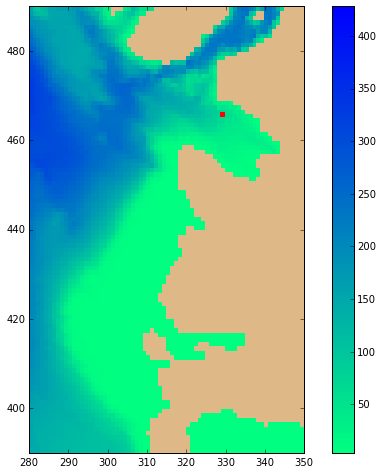

In [3]:
# Bathymetry (Close-Up)
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
cmap = plt.get_cmap('winter_r')
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(bathy, cmap=cmap)
fig.colorbar(mesh)
plt.axis((280, 350, 390, 490))

ax.scatter(329,466,color='red',marker='s')

In [4]:
tracers = NC.Dataset('/data/dlatorne/MEOPAR/SalishSea/nowcast/4-10oct14/SalishSea_1h_20141004_20141010_grid_U.nc')
nc_tools.show_variables(tracers)
v=tracers.variables['vozocrtx']
v.shape

[u'depthu', u'nav_lat', u'nav_lon', u'time_counter', u'time_counter_bnds', u'u_wind_stress', u'vozocrtx']


(168, 40, 898, 398)

In [5]:
tracers = NC.Dataset('/data/dlatorne/MEOPAR/SalishSea/results/gem-res-19-20sep14/SalishSea_1h_20140919_20140920_grid_U.nc')
nc_tools.show_variables(tracers)
v=tracers.variables['vozocrtx']
v.shape

[u'depthu', u'nav_lat', u'nav_lon', u'time_counter', u'time_counter_bnds', u'u_wind_stress', u'vozocrtx']


(48, 40, 898, 398)

In [6]:
tracers = NC.Dataset('/data/dlatorne/MEOPAR/SalishSea/results/gem-res-21-23sep14/SalishSea_1h_20140921_20140923_grid_U.nc')
nc_tools.show_variables(tracers)
v=tracers.variables['vozocrtx']
v.shape

[u'depthu', u'nav_lat', u'nav_lon', u'time_counter', u'time_counter_bnds', u'u_wind_stress', u'vozocrtx']


(72, 40, 898, 398)

In [7]:
tracersT = NC.Dataset('/data/dlatorne/MEOPAR/SalishSea/nowcast/4-10oct14/SalishSea_1h_20141004_20141010_grid_T.nc')
nc_tools.show_variables(tracersT)
ssh = tracersT.variables['sossheig']
timesteps = tracersT.variables['time_counter']
nc_tools.timestamp(tracersT, 97)

[u'deptht', u'nav_lat', u'nav_lon', u'rain_rate', u'snow_rate', u'sossheig', u'time_counter', u'time_counter_bnds', u'vosaline', u'votemper']


<Arrow [2014-10-08T01:30:00+00:00]>

#### Particles 1, 2, 3

In [8]:
one = NC.Dataset('/ocean/imachuca/MEOPAR/Ariane/results/drifter_compare/sept1920/P1B3/ariane_trajectories_qualitative.nc','r')
lon1=one.variables['traj_lon']
lat1=one.variables['traj_lat']

In [9]:
two = NC.Dataset('/ocean/imachuca/MEOPAR/Ariane/results/drifter_compare/sept1920/P2B4/ariane_trajectories_qualitative.nc','r')
lon2=two.variables['traj_lon']
lat2=two.variables['traj_lat']

In [10]:
three = NC.Dataset('/ocean/imachuca/MEOPAR/Ariane/results/drifter_compare/sept1920/P3B7/ariane_trajectories_qualitative.nc','r')
lon3=three.variables['traj_lon']
lat3=three.variables['traj_lat']

#### Particles 4, 5, 6

In [11]:
four = NC.Dataset('/ocean/imachuca/MEOPAR/Ariane/results/drifter_compare/sept1920/P4D1/ariane_trajectories_qualitative.nc','r')
lon4=four.variables['traj_lon']
lat4=four.variables['traj_lat']

In [12]:
five = NC.Dataset('/ocean/imachuca/MEOPAR/Ariane/results/drifter_compare/sept1920/P5D2/ariane_trajectories_qualitative.nc','r')
lon5=five.variables['traj_lon']
lat5=five.variables['traj_lat']

In [13]:
six = NC.Dataset('/ocean/imachuca/MEOPAR/Ariane/results/drifter_compare/sept1920/P6D3/ariane_trajectories_qualitative.nc','r')
lon6=six.variables['traj_lon']
lat6=six.variables['traj_lat']

#### Oct 8: Drop 1

In [14]:
o112 = NC.Dataset('/ocean/imachuca/MEOPAR/Ariane/results/drifter_compare/oct8/drop1/12/ariane_trajectories_qualitative.nc','r')
lon112=o112.variables['traj_lon']
lat112=o112.variables['traj_lat']

In [15]:
o13 = NC.Dataset('/ocean/imachuca/MEOPAR/Ariane/results/drifter_compare/oct8/drop1/3/ariane_trajectories_qualitative.nc','r')
lon13=o13.variables['traj_lon']
lat13=o13.variables['traj_lat']

#### Oct 8: Drop 2

In [16]:
o212 = NC.Dataset('/ocean/imachuca/MEOPAR/Ariane/results/drifter_compare/oct8/drop2/12/ariane_trajectories_qualitative.nc','r')
lon212=o212.variables['traj_lon']
lat212=o212.variables['traj_lat']

In [17]:
o23 = NC.Dataset('/ocean/imachuca/MEOPAR/Ariane/results/drifter_compare/oct8/drop2/3/ariane_trajectories_qualitative.nc','r')
lon23=o23.variables['traj_lon']
lat23=o23.variables['traj_lat']

#### Oct 8: Drop 3

In [18]:
o31 = NC.Dataset('/ocean/imachuca/MEOPAR/Ariane/results/drifter_compare/oct8/drop3/1/ariane_trajectories_qualitative.nc','r')
lon31=o31.variables['traj_lon']
lat31=o31.variables['traj_lat']

In [19]:
o323 = NC.Dataset('/ocean/imachuca/MEOPAR/Ariane/results/drifter_compare/oct8/drop3/23/ariane_trajectories_qualitative.nc','r')
lon323=o323.variables['traj_lon']
lat323=o323.variables['traj_lat']

#### Sept 20 - 21

In [20]:
seq = NC.Dataset('/ocean/imachuca/MEOPAR/Ariane/results/drifter_compare/sequential/ariane_trajectories_qualitative.nc','r')
lonseq=seq.variables['traj_lon']
latseq=seq.variables['traj_lat']
lonseq.shape

(23, 1)

#### September 21

In [21]:
U10 = NC.Dataset('/ocean/imachuca/MEOPAR/Ariane/results/drifter_compare/sept21/UBC10/ariane_trajectories_qualitative.nc','r')
lonU10=U10.variables['traj_lon']
latU10=U10.variables['traj_lat']

In [22]:
U8 = NC.Dataset('/ocean/imachuca/MEOPAR/Ariane/results/drifter_compare/sept21/UBC8/ariane_trajectories_qualitative.nc','r')
lonU8=U8.variables['traj_lon']
latU8=U8.variables['traj_lat']

In [23]:
U7 = NC.Dataset('/ocean/imachuca/MEOPAR/Ariane/results/drifter_compare/sept21/UBC7/ariane_trajectories_qualitative.nc','r')
lonU7=U7.variables['traj_lon']
latU7=U7.variables['traj_lat']

In [24]:
U4 = NC.Dataset('/ocean/imachuca/MEOPAR/Ariane/results/drifter_compare/sept21/UBC4/ariane_trajectories_qualitative.nc','r')
lonU4=U4.variables['traj_lon']
latU4=U4.variables['traj_lat']

In [25]:
U3 = NC.Dataset('/ocean/imachuca/MEOPAR/Ariane/results/drifter_compare/sept21/UBC3/ariane_trajectories_qualitative.nc','r')
lonU3=U3.variables['traj_lon']
latU3=U3.variables['traj_lat']

# Plotting Function

**part** is to define the particle for datasets that have more than 1 particle because they all share the same duration. **start** is the day when you start getting tide information, **end** is the last day. **month** you're looking at - right now, we can only look at september using this method. **start_d** is the minimum x limit, and **end_d** is the maximum. To plot the red vertical line which shows when the particle trajectory begins, we need **day**, **hour**, **minute**. Since the particle trajectories in september never overflow into another day, we can simply add **duration** to **hour** to plot the blue vertical line that shows when the trajectory ends.

In [26]:
def plotsept(lon,lat,part,start,end,start_d,end_d,day,hour,minute,duration):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))
    viz_tools.plot_coastline(ax1,grid,coords='map')
    viz_tools.plot_coastline(ax1,grid,coords='map',isobath=4,color='FireBrick')
    viz_tools.plot_coastline(ax1,grid,coords='map',isobath=20,color='OrangeRed')
    ax1.set_xlim([-123.6,-123])
    ax1.set_ylim([48.8,49.4])
    ax1.scatter(lon[1:,part],lat[1:,part],color='DodgerBlue',marker='o',label='Model')
    ax1.scatter(lon[0,part],lat[0,part],color='0.30',marker='s')
    ax1.plot(-123-np.array([18.2,13.7,12])/60.,49+np.array([6.4,8,7.6])/60.,'-k',lw=2,color='Indigo')
    ax1.legend()
    
    wlev = stormtools.load_observations(start,end,'PointAtkinson')
    
    ax2.plot(wlev.time,wlev.slev,'-k')
    ax2.set_xlim(dt.datetime(2014,9,start_d),dt.datetime(2014,9,end_d))
    ax2.set_xticklabels([])

    ax2.set_ylabel('Water level (m)')
    ax2.set_xlabel('Sept ' + str(start_d) + ' - Sept ' + str(end_d-1) + ' (hrs)')
    ax2.set_title('stormtools, Point Atkinson')

    diff = 24 - hour
    hour2 = duration - diff
    
    if hour2 > 0:
        day = day
        day2 = day + 1
        hour2 = hour2
    else:
        day = day
        day2 = day
        hour2 = hour+duration
        
    t=dt.datetime(2014,9,day,hour,minute)
    ax2.plot([t,t],[1.5,4.5],'r-',label='start')
    tt=dt.datetime(2014,9,day2,hour2,minute)
    ax2.plot([tt,tt],[1.5,4.5],'b-',label='end')
    ax2.legend()
    
    [wind_speed,wind_dir,temp,time, lat, lon] = stormtools.get_EC_observations('Sandheads',start,end)
    
    fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(11, 5))
    ax3.plot(time,wind_speed,'-k')
    ax3.set_xlim(dt.datetime(2014,9,start_d),dt.datetime(2014,9,end_d))
    ax3.set_xticklabels([])
    ax3.set_xlabel('Sept ' + str(start_d) + ' - Sept ' + str(end_d-1) + ' (hrs)')
    ax3.set_ylabel('Wind Speed (m/s)')
    ax3.set_title('Sandheads')
    
    t=dt.datetime(2014,9,day,hour,minute)
    ax3.plot([t,t],[0,9],'r-',label='start')
    tt=dt.datetime(2014,9,day2,hour2,minute)
    ax3.plot([tt,tt],[0,9],'b-',label='end')
    ax3.legend(loc='lower right')
    
    ax4.plot(time,wind_dir,'-k')
    ax4.set_xlim(dt.datetime(2014,9,start_d),dt.datetime(2014,9,end_d))
    ax4.set_xticklabels([])
    ax4.set_xlabel('Sept ' + str(start_d) + ' - Sept ' + str(end_d-1) + ' (hrs)')
    ax4.set_ylabel('Wind Direction (deg CCW of E)')
    ax4.set_title('Sandheads')
    
    t=dt.datetime(2014,9,day,hour,minute)
    ax4.plot([t,t],[0,350],'r-',label='start')
    tt=dt.datetime(2014,9,day2,hour2,minute)
    ax4.plot([tt,tt],[0,350],'b-',label='end')
    ax4.legend(loc='lower right')

In [56]:
def plottrackonly(lats, lons, bath, lon, lat, part=0):
    '''Make a colour plot of the model drifter'''
     # setup
    fig, ax = plt.subplots(1,1,figsize=(7,7))
     # background
    cmap = plt.get_cmap('winter_r')
    cmap.set_bad('burlywood')
    ax.pcolormesh(lons, lats, bath, cmap=cmap)
    ax.set_title('Modelled Drift Track')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.text(-123.15,49.13, "Fraser River", fontsize=12)
    ax.set_xlim([-123.6,-123])
    ax.set_ylim([48.8,49.4])
      # trajectory            
    ax.scatter(lon[1:,part],lat[1:,part],color='blue',marker='o',label='Model',s=30)
    ax.scatter(lon[0,part],lat[0,part],color='red',marker='s',s=40)
    ax.plot(-123-np.array([18.2,13.7,12])/60.,49+np.array([6.4,8,7.6])/60.,'-k',lw=2,color='Indigo')
  
        

In [27]:
def plotoct(lon,lat,part,start,end,start_d,end_d,day,hour,minute,duration):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))
    viz_tools.plot_coastline(ax1,grid,coords='map')
    viz_tools.plot_coastline(ax1,grid,coords='map',isobath=4,color='FireBrick')
    viz_tools.plot_coastline(ax1,grid,coords='map',isobath=20,color='OrangeRed')
    ax1.set_xlim([-123.6,-123])
    ax1.set_ylim([48.8,49.4])
    ax1.scatter(lon[1:,part],lat[1:,part],color='DodgerBlue',marker='o',label='Model')
    ax1.scatter(lon[0,part],lat[0,part],color='0.30',marker='s')
    ax1.plot(-123-np.array([18.2,13.7,12])/60.,49+np.array([6.4,8,7.6])/60.,'-k',lw=2,color='Indigo')
    ax1.legend()
    
    ax2.plot(timesteps[96:144],ssh[96:144,466,329],'-k')
    
    ax2.set_xticklabels([])
    ax2.set_ylabel('Water level (m)')
    ax2.set_xlabel('Oct 8 - Oct 9 (hrs)')
    ax2.set_title('sossheig, ~Point Atkinson')
        
    t=96+hour
    ax2.plot([timesteps[t],timesteps[t]],[-2.0,1.5],'r-',label='start')
    
    t2=96+hour+duration
    ax2.plot([timesteps[t2],timesteps[t2]],[-2.0,1.5],'b-',label='end')
    
    [wind_speed,wind_dir,temp,time, lat, lon] = stormtools.get_EC_observations('Sandheads',start,end)
    
    fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(11, 5))
    ax3.plot(time,wind_speed,'-k')
    ax3.set_xlim(dt.datetime(2014,10,start_d),dt.datetime(2014,10,end_d))
    ax3.set_xticklabels([])
    ax3.set_xlabel('Oct 8 - Oct 9 (hrs)')
    ax3.set_ylabel('Wind Speed (m/s)')
    ax3.set_title('Sandheads')
    
    diff = 24 - hour
    hour2 = duration - diff
    day2 = day +1
    
    t=dt.datetime(2014,10,day,hour,minute)
    ax3.plot([t,t],[0,10],'r-',label='start')
    tt=dt.datetime(2014,10,day2,hour2,minute)
    ax3.plot([tt,tt],[0,10],'b-',label='end')
    ax3.legend(loc='upper left')

    ax4.plot(time,wind_dir,'-k')
    ax4.set_xlim(dt.datetime(2014,10,start_d),dt.datetime(2014,10,end_d))
    ax4.set_xticklabels([])
    ax4.set_xlabel('Oct 8 - Oct 9 (hrs)')
    ax4.set_ylabel('Wind Direction (deg CCW of E)')
    ax4.set_title('Sandheads')
    

    t=dt.datetime(2014,10,day,hour,minute)
    ax4.plot([t,t],[0,350],'r-',label='start')
    tt=dt.datetime(2014,10,day2,hour2,minute)
    ax4.plot([tt,tt],[0,350],'b-',label='end')
    ax4.legend(loc='upper left')

# 3. September 19th Comparisons

## Buoy 3 vs Particle 1: NEMO coords (j,i): 432,269 at 10:20 for 11 hours

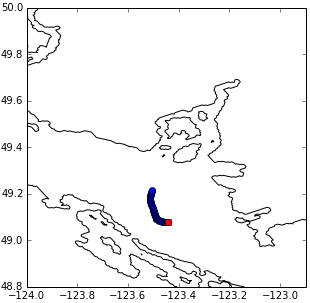

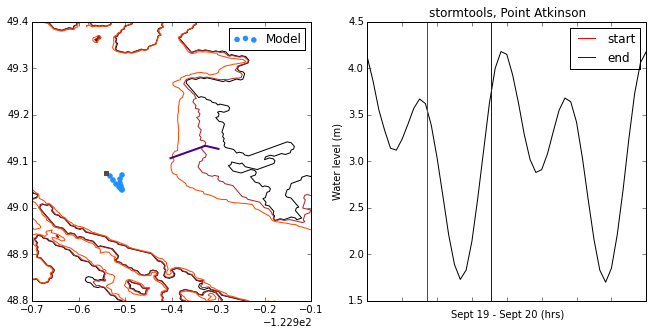

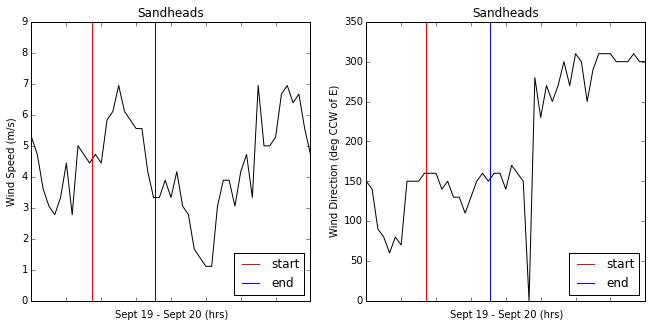

In [28]:
plotsept(lon1,lat1,0,'18-Sep-2014','21-Sep-2014',19,21,19,10,20,11)
Image(filename='B3.png')

## Buoy 4 vs Particle 2: NEMO coords (j,i): 432,269 at 11:40 for 10 hours

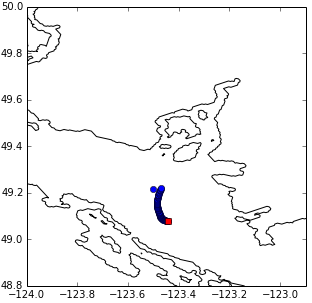

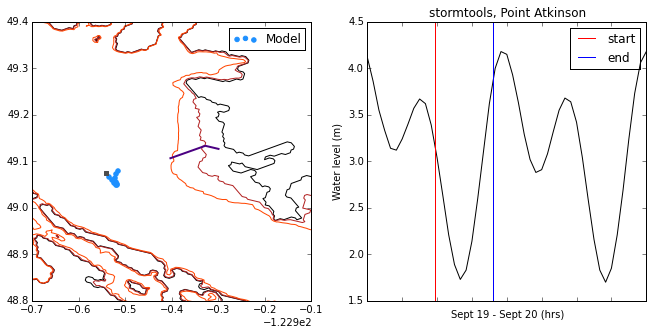

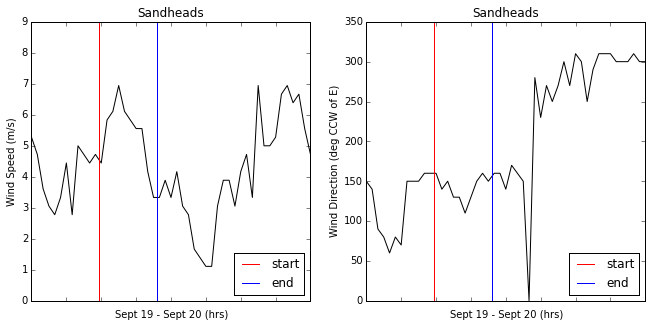

In [29]:
plotsept(lon2,lat2,0,'18-Sep-2014','21-Sep-2014',19,21,19,11,40,10)
Image(filename='B4.png')

## Buoy 7 vs Particle 3: NEMO coords (j,i): 433,269 at 13:10 for 8 hours

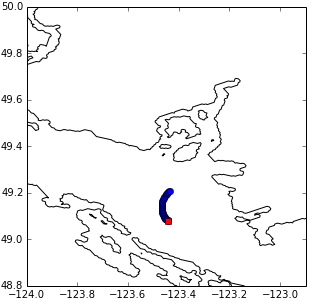

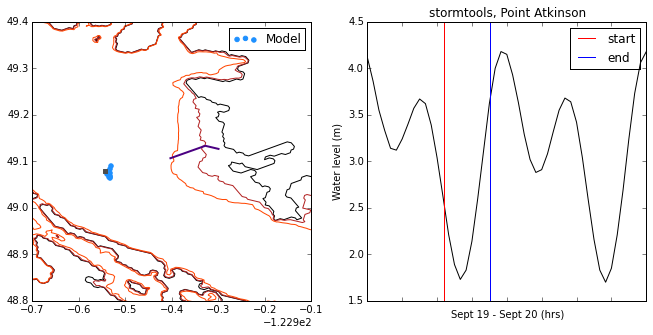

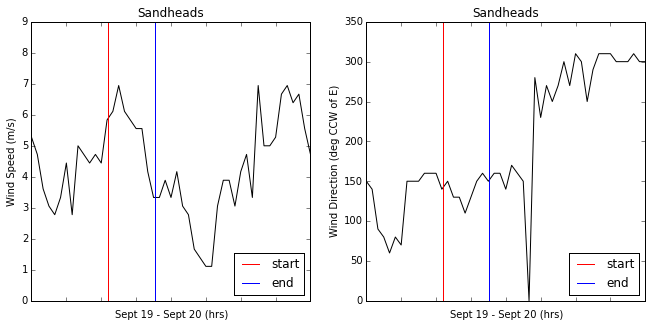

In [30]:
plotsept(lon3,lat3,0,'18-Sep-2014','21-Sep-2014',19,21,19,13,10,8)
Image(filename='B7.png')

# 4. September 20th Comparisons

## Drop 1 vs Particle 4: NEMO coords (j,i): 431,269 at 4:40 for 13 hours

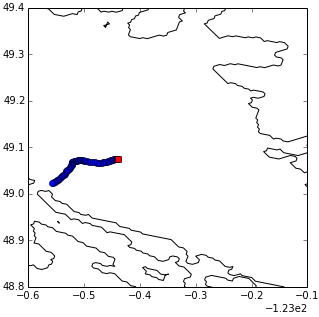

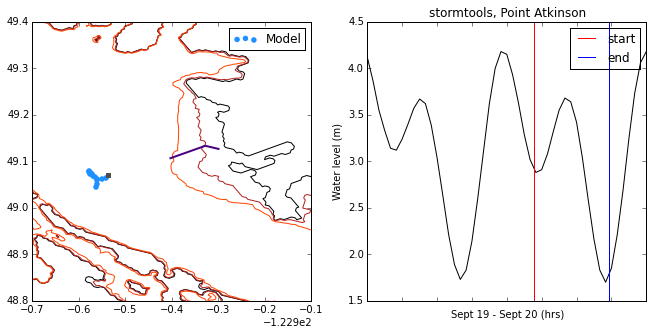

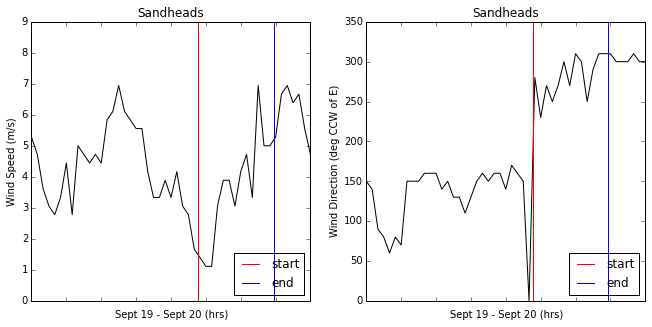

In [31]:
plotsept(lon4,lat4,0,'18-Sep-2014','21-Sep-2014',19,21,20,4,40,13)
Image(filename='D1.png')

## Drop 2 vs Particle 5: NEMO coords (j,i): 432,269 at 11:10 for 7 hours

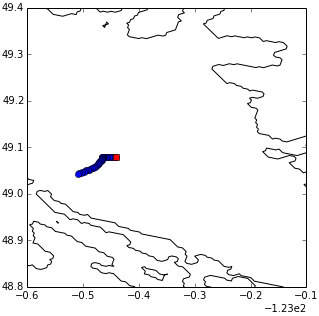

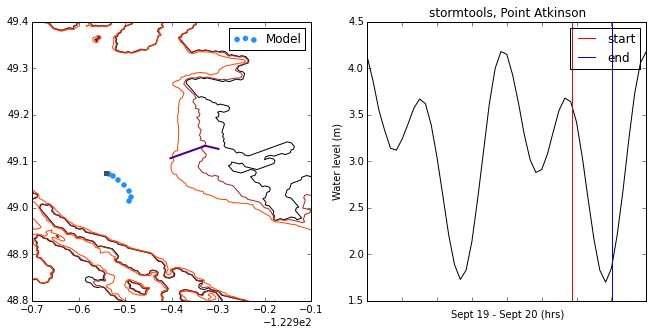

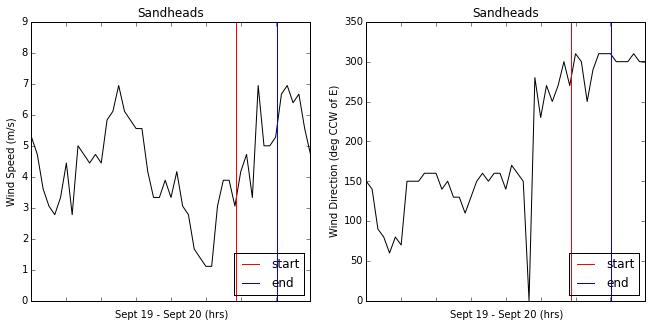

In [32]:
plotsept(lon5,lat5,0,'18-Sep-2014','21-Sep-2014',19,21,20,11,10,7)
Image(filename='D2.png')

## Drop 3 vs Particle 6: NEMO coords (j,i): 432,268 at 13:20 for 6 hours

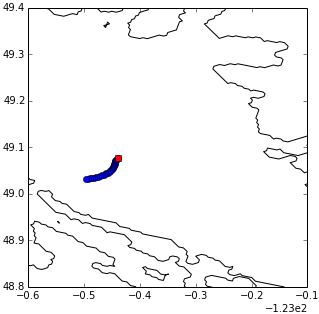

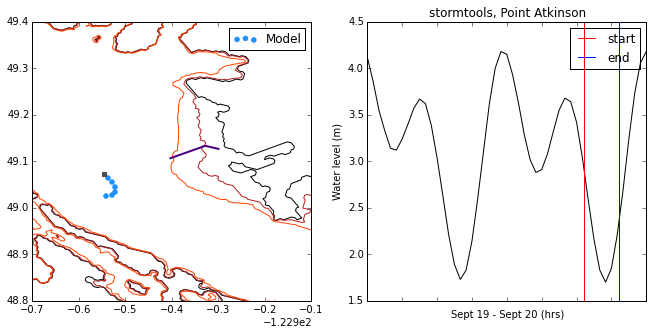

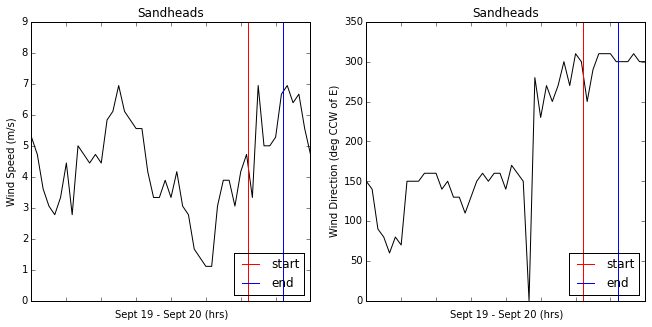

In [33]:
plotsept(lon6,lat6,0,'18-Sep-2014','21-Sep-2014',19,21,20,13,20,6)
Image(filename='D3.png')

# 5. October 8th Comparisons

## Drop 1: NEMO coods (j,i): 429, 290 at 16:00 hours for 29 hours

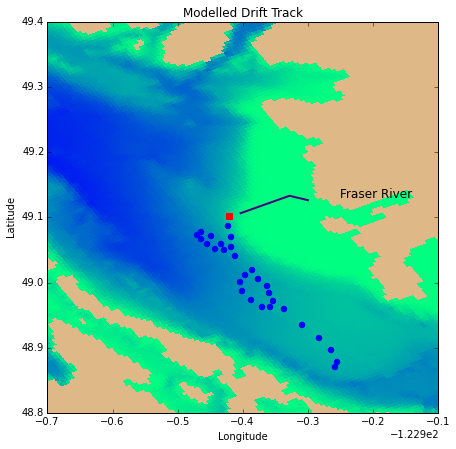

In [57]:
plottrackonly(lats[:,:], lons[:,:], bath[:,:], lon112, lat112)

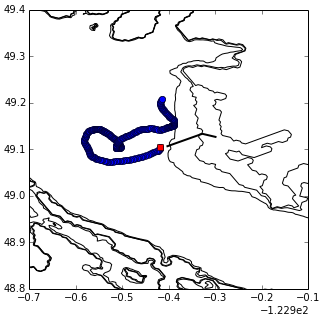

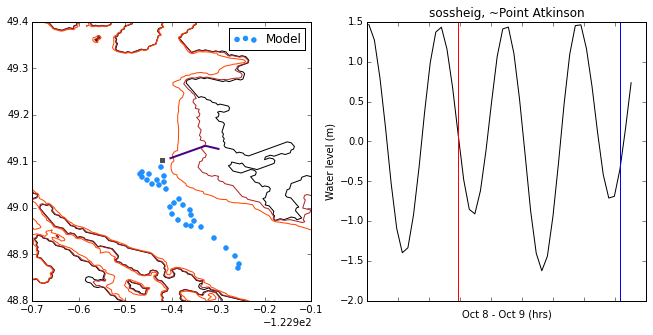

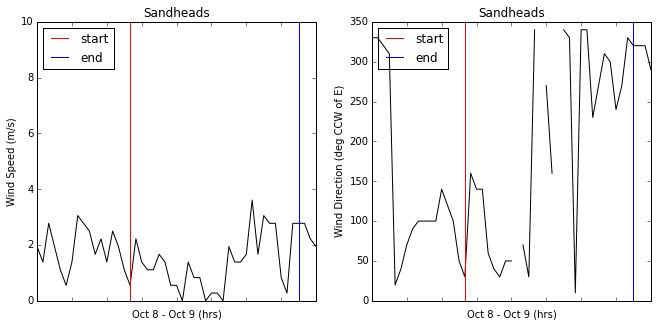

In [41]:
plotoct(lon112,lat112,0,'7-Oct-2014','11-Oct-2014',8,10,8,16,0,29)
Image(filename='/ocean/imachuca/MEOPAR/analysis/Idalia/drop112a.png')

## Drop 1: NEMO coods (j,i): 429, 290 at 17:30 hours for 29 hours

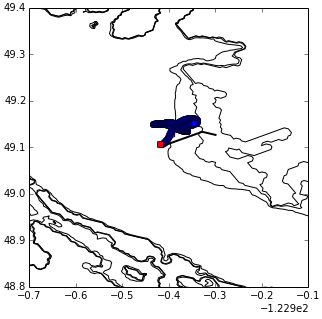

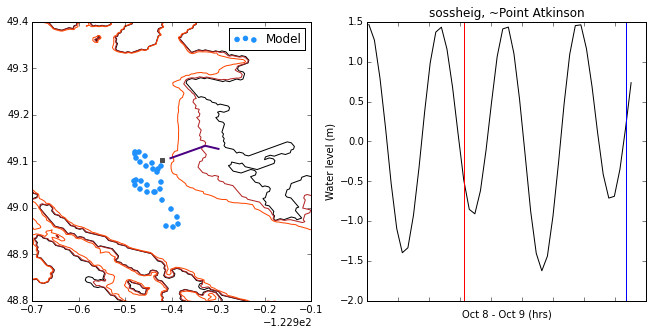

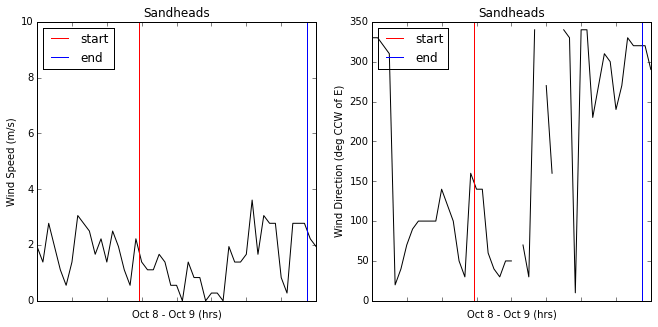

In [36]:
plotoct(lon112,lat112,1,'7-Oct-2014','11-Oct-2014',8,10,8,17,30,29)
Image(filename='/ocean/imachuca/MEOPAR/analysis/Idalia/drop112b.png')

## Drop 1: NEMO coods (j,i): 429, 290 at 19:30 hours for 7 hours 

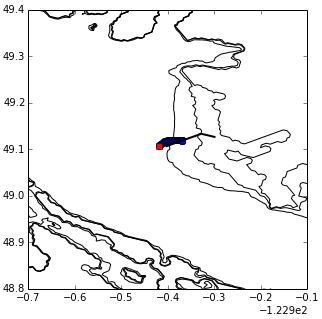

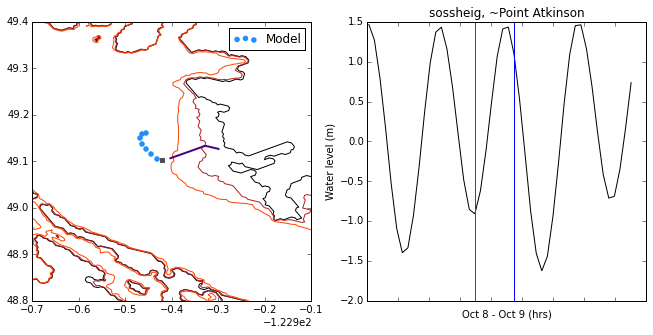

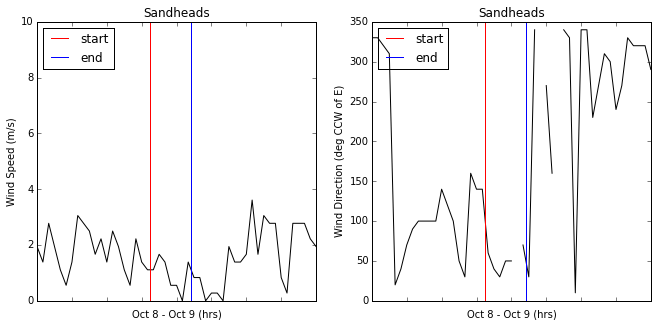

In [37]:
plotoct(lon13,lat13,0,'7-Oct-2014','11-Oct-2014',8,10,8,19,30,7)
Image(filename='/ocean/imachuca/MEOPAR/analysis/Idalia/drop13.png')

## Drop 2: NEMO coods (j,i): 427, 288 at 16:00 hours for 27 hours

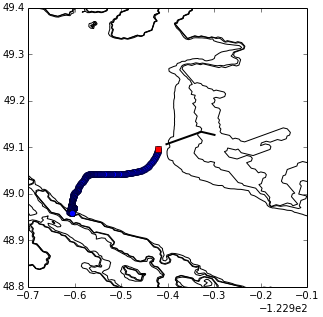

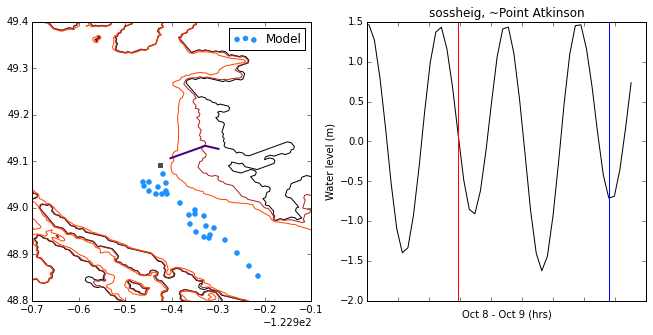

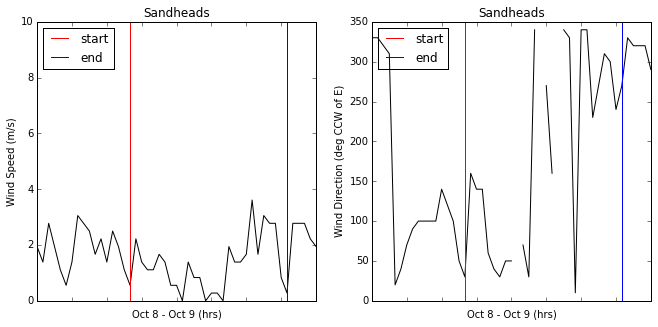

In [38]:
plotoct(lon212,lat212,0,'7-Oct-2014','11-Oct-2014',8,10,8,16,0,27)
Image(filename='/ocean/imachuca/MEOPAR/analysis/Idalia/drop212a.png')

## Drop 2: NEMO coods (j,i): 427, 289 at 17:30 hours for 27 hours

In [ ]:
plotoct(lon212,lat212,1,'7-Oct-2014','11-Oct-2014',8,10,8,17,30,27)
Image(filename='drop212b.png')

## Drop 2: NEMO coods (j,i): 427, 289 at 19:30 hours for 25 hours

In [ ]:
plotoct(lon23,lat23,0,'7-Oct-2014','11-Oct-2014',8,10,8,19,30,25)
Image(filename='drop23.png')

## Drop 3: NEMO coods (j,i): 425, 287 at 16:00 hours for 27 hours

In [ ]:
plotoct(lon31,lat31,0,'7-Oct-2014','11-Oct-2014',8,10,8,16,0,27)
Image(filename='drop31.png')

## Drop 3: NEMO coods (j,i): 425, 287 at 17:30 hours for 24 hours 

In [ ]:
plotoct(lon323,lat323,0,'7-Oct-2014','11-Oct-2014',8,10,8,17,30,24)
Image(filename='drop323a.png')

## Drop 3: NEMO coods (j,i): 425, 287 at 19:00 hours for 24 hours

In [ ]:
plotoct(lon323,lat323,1,'7-Oct-2014','11-Oct-2014',8,10,8,19,0,24)
Image(filename='drop323b.png')

# 6. [Sequential] September 20 - 21: NEMO coords (j,i): 427,290 at 20:20 for 22 hours

In [ ]:
plotsept(lonseq,latseq,0,'19-Sep-2014','22-Sep-2014',20,22,20,20,20,22)
Image(filename='dropsequential.png')

# 7. September 21

## NEMO coords (j,i): 422,287 at 06:30 for 12 hours (UBC 10)

In [ ]:
plotsept(lonU10, latU10, 0, '20-Sep-2014', '23-Sep-2014', 21, 23, 21, 6, 30, 12)
Image(filename='drop10.png')

## NEMO coords (j,i): 422,279 at 08:50 for 10 hours (UBC 8)

In [ ]:
plotsept(lonU8, latU8, 0, '20-Sep-2014', '23-Sep-2014', 21, 23, 21, 8, 50, 10)
Image(filename='drop08.png')

## NEMO coords (j,i): 423,270 at 09:10 for 9 hours (UBC 7)

In [ ]:
plotsept(lonU7, latU7, 0, '20-Sep-2014', '23-Sep-2014', 21, 23, 21, 9, 10, 9)
Image(filename='drop07.png')

## NEMO coords (j,i): 424,262 at 09:30 for 9 hours (UBC 4)

In [ ]:
plotsept(lonU4, latU4, 0, '20-Sep-2014', '23-Sep-2014', 21, 23, 21, 9, 30, 9)
Image(filename='drop04.png')

## NEMO coords (j,i): 424,254 at 10:00 for 9 hours (UBC 3)

In [ ]:
plotsept(lonU3, latU3, 0, '20-Sep-2014', '23-Sep-2014', 21, 23, 21, 10, 0, 9)
Image(filename='drop03.png')